In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Data Science and Big Data\StudentPerformance.csv")
df.head()

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,63,78,67,88,2018,3
1,69,80,74,80,2019,2
2,66,80,76,89,2018,3
3,68,79,64,84,2018,2
4,75,77,71,95,2021,3


In [4]:
df.shape

(30, 6)

In [5]:
df.dtypes

math_score               int64
reading_score            int64
writing_score            int64
placement_score          int64
club_join_year           int64
placement_offer_count    int64
dtype: object

In [6]:
df.isna().sum()

math_score               0
reading_score            0
writing_score            0
placement_score          0
club_join_year           0
placement_offer_count    0
dtype: int64

In [7]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

[]

In [8]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df.head()

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,63,78,67,88,2018,3
1,69,80,74,80,2019,2
2,66,80,76,89,2018,3
3,68,79,64,84,2018,2
4,75,77,71,95,2021,3


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

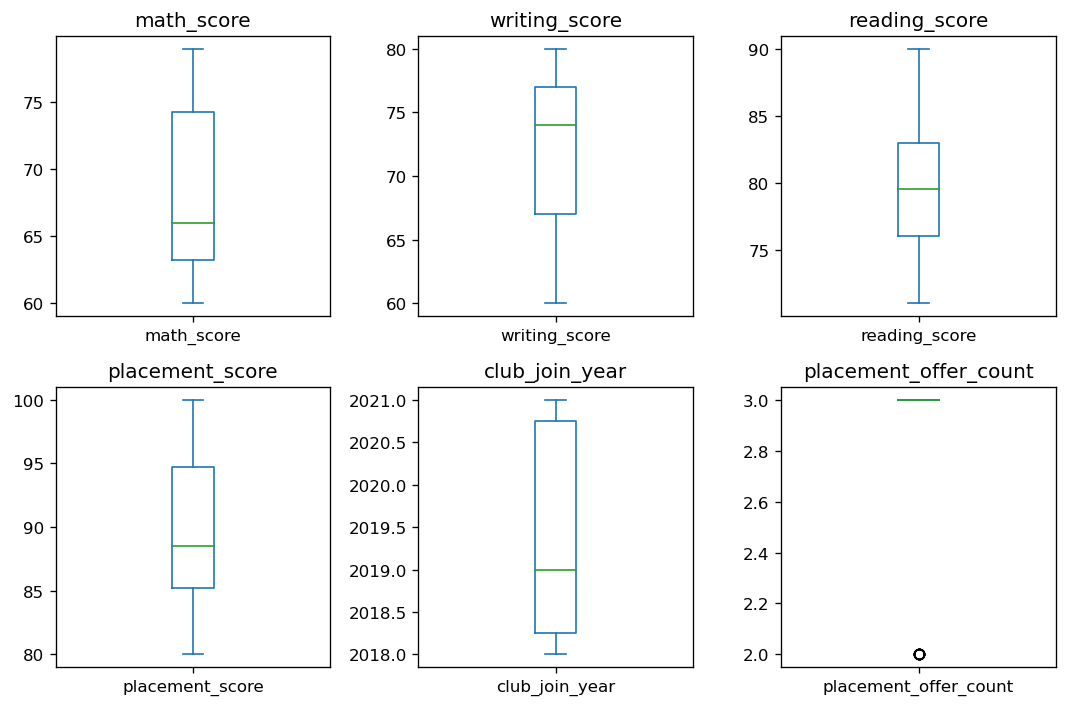

In [12]:
df_list = ['math_score', 'writing_score', 'reading_score',
           'placement_score', 'club_join_year', 'placement_offer_count']
fig, axes = plt.subplots(2, 3, figsize=(9, 6), dpi=120)

for i, ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')

plt.tight_layout() 
plt.show()

In [14]:
Q1 = df['writing_score'].quantile(0.25)
Q3 = df['writing_score'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 67.0, Q3 = 77.0, IQR = 10.0, Lower_limit = 52.0, Upper_limit = 92.0


In [15]:
df[(df['writing_score'] < Lower_limit) | (df['writing_score'] > Upper_limit)]

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count


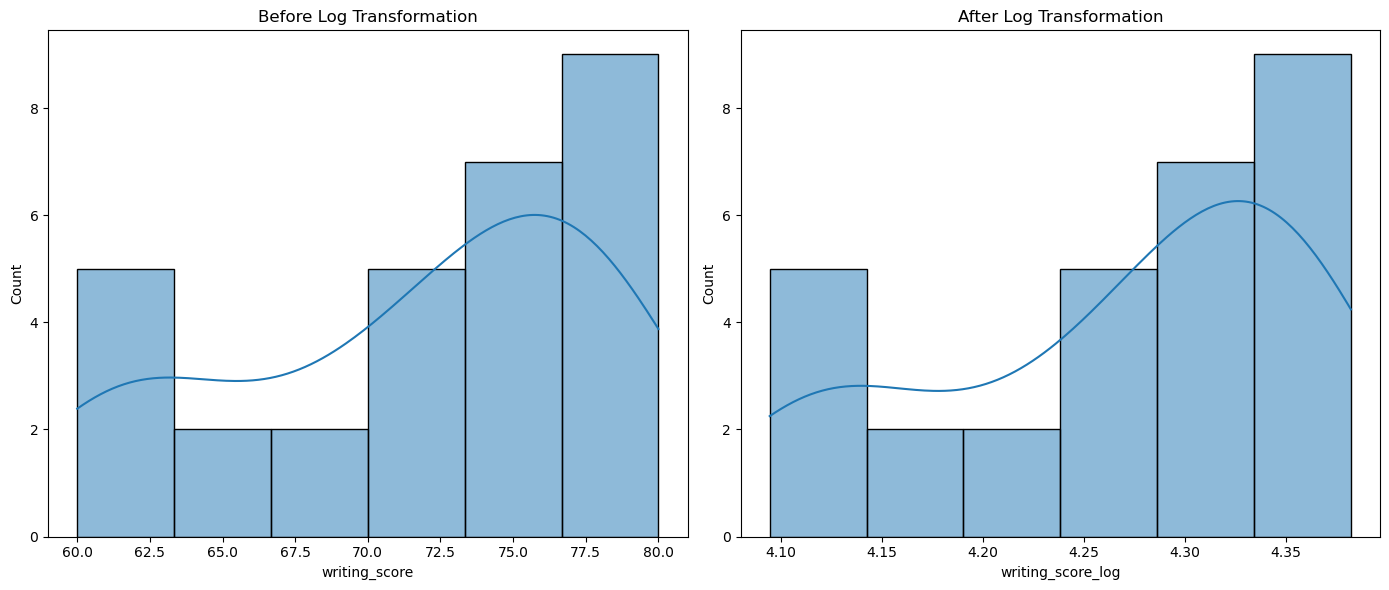

In [16]:
df['writing_score_log'] = np.log(df['writing_score'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="writing_score", ax=axes[0], kde=True)
sns.histplot(data=df, x="writing_score_log", ax=axes[1], kde=True)

axes[0].set_title('Before Log Transformation')
axes[1].set_title('After Log Transformation')

plt.tight_layout()
plt.show()

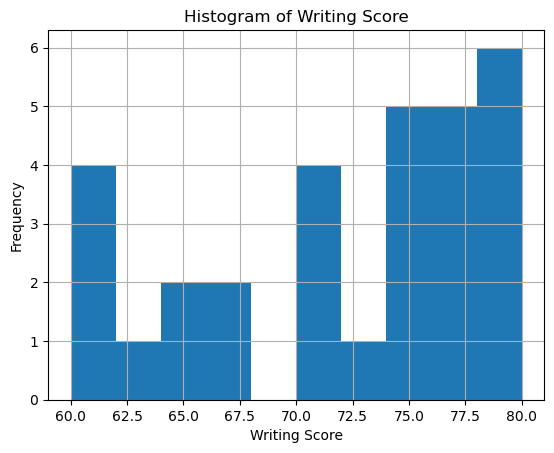

In [18]:
df['writing_score'].plot.hist(bins=10)  
plt.title('Histogram of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()